zomato data analysis project using python 

importing libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

creating a dataframe

In [8]:
dataframe=pd.read_csv("C:\\Users\\user\\Desktop\\Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [9]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


data cleaning 

In [12]:
def handlerate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


type of resturant 

Text(0.5, 0, 'type of resturant')

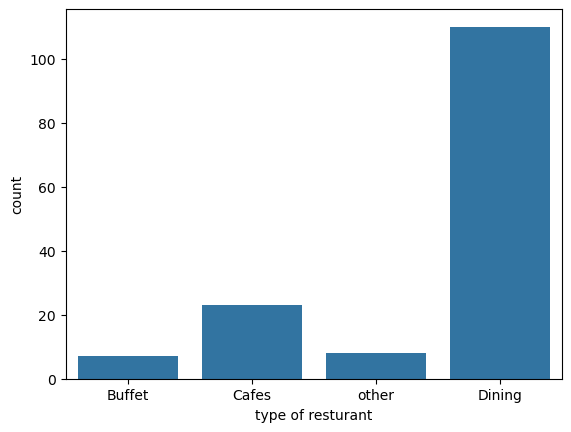

In [24]:
sns.countplot(x=dataframe['listed_in(type)'])

plt.xlabel("type of resturant")

conclusion - majority of customers order from dining 

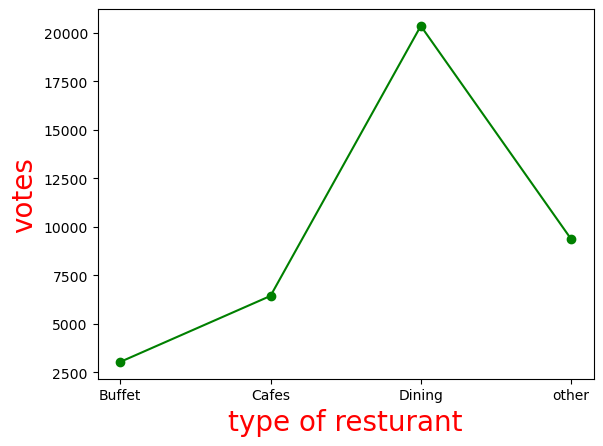

In [31]:
grouped_data=dataframe.groupby("listed_in(type)")["votes"].sum()
result= pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker='o')
plt.xlabel("type of resturant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)
plt.show()

conclusion-dining resturants have recieved maximum votes 

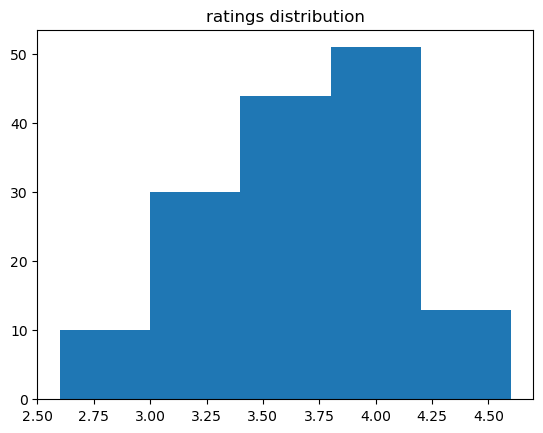

In [37]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

conclusion - the majority restuarants recieved ratings are between 3.5-4


AVERAGE ORDER SPENDING BY COUPLES

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

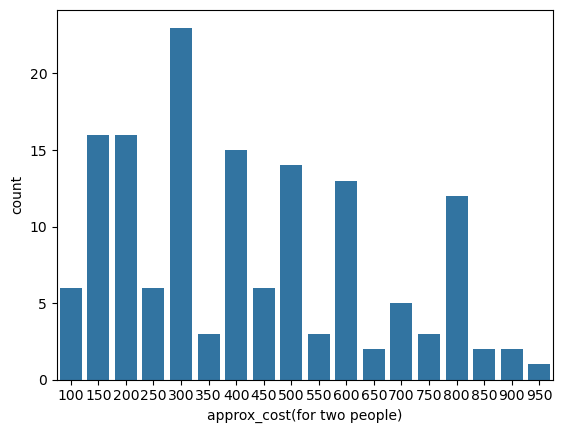

In [38]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion - the majority of couples prefer to spend 300rs on their order

WHICH MODE(ONLINE/OFFLINE) GETS HIGH RATING

<Axes: xlabel='online_order', ylabel='rate'>

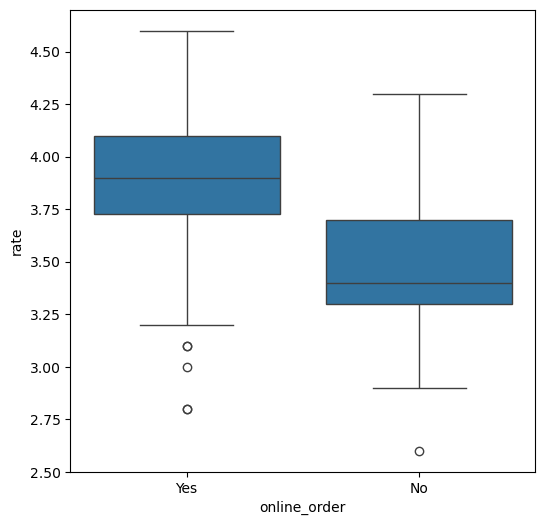

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

conclusion - offline orders received low ratings compared to online ratings

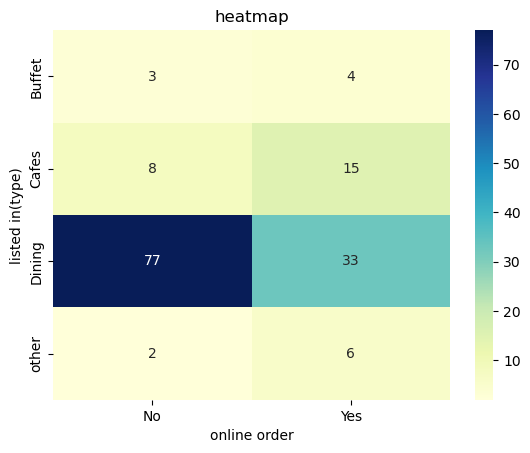

In [45]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed in(type)")
plt.show()

conclusion - Dining resturants primarily accept offline orders,whereas caes primarily receive online orders.This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.